# **Proyecto 1**
### Aprendizaje automático de máquina

Natalia Martinez Neira & Juan Jose Caballero

In [ ]:
# Importamos las librerias correspondientes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
import random

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Dataset HousingData

Es un conjunto de datos con 12 atributos sobre casa en una región de Estados Unidos, donde buscaremos predecir el precio total de una vivienda.

In [ ]:
# Importamos el conjunto de datos

df = pd.read_csv('HousingData1').dropna()
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7


La base de datos esta compuesta por variables propias de una vivienda tal como cantidad promedio de habitaciones por vivienda (rm) o proporcion de suelo residencial para lotes de mas de 25000 pies cuadrados (zn). Tambien podemos encontrar variables que representan caracteristicas de la ubicacion de la vivienda tales como la media ponderada de las distancias a cinco centros de empleo de Boston (dis) o indice de accesibilidad a carreteras radiales (rad). En esta categoria se encuentran la mayoria de las variables por lo cual cuando hagamos el analisis este aspecto en especifico va a influir bastante. Y el ultimo tipo de variables que hay son los relacionados con la poblacion tales como la taza de crimen per capita (crim) o porcentaje de status baho de la poblacion (lstat).

In [ ]:
# Asignamos la variable objetivo a y
# En X removemos la variable objetivo y una columna de enumeración

y = df['MEDV']
X = df.drop(['Unnamed: 0', 'MEDV'], axis = 1)

In [ ]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21


In [ ]:
# Entrenamos el conjunto de datos con una proporción de 75-25 en entrenamiento-testeo

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25, shuffle = True)

## **Regresión lineal**

In [ ]:
# Entrenamos el modelo de regresión lineal

regr = LinearRegression()
regr.fit(X_train, y_train)
print("Coeficiente de determinación: ", regr.score(X_test, y_test))

Coeficiente de determinación:  0.650742992956431


In [ ]:
y_pred = regr.predict(X_test)
print('Slope:', regr.coef_)

Slope: [-8.89304980e-02  4.23066830e-02  5.36175153e-02  2.94755318e+00
 -2.22406903e+01  4.70216396e+00 -1.92312218e-02 -1.51629532e+00
  2.26467496e-01 -1.29892438e-02 -9.34631896e-01 -3.80466862e-01]


Los atributos **ZN, INDUS, CHAS, RM** y **RAD** fueron los atributos que obtuvieron mayor coeficiente. Por consiguinte, son los atributos que más afectan la variable objetivo.

In [ ]:
# Creamos una matriz de lambdas para encontrar un valor óptimo para alpha

lambdas = 10**np.linspace(10,-2,100)
lambdas

array([1.00000000e+10, 7.56463328e+09, 5.72236766e+09, 4.32876128e+09,
       3.27454916e+09, 2.47707636e+09, 1.87381742e+09, 1.41747416e+09,
       1.07226722e+09, 8.11130831e+08, 6.13590727e+08, 4.64158883e+08,
       3.51119173e+08, 2.65608778e+08, 2.00923300e+08, 1.51991108e+08,
       1.14975700e+08, 8.69749003e+07, 6.57933225e+07, 4.97702356e+07,
       3.76493581e+07, 2.84803587e+07, 2.15443469e+07, 1.62975083e+07,
       1.23284674e+07, 9.32603347e+06, 7.05480231e+06, 5.33669923e+06,
       4.03701726e+06, 3.05385551e+06, 2.31012970e+06, 1.74752840e+06,
       1.32194115e+06, 1.00000000e+06, 7.56463328e+05, 5.72236766e+05,
       4.32876128e+05, 3.27454916e+05, 2.47707636e+05, 1.87381742e+05,
       1.41747416e+05, 1.07226722e+05, 8.11130831e+04, 6.13590727e+04,
       4.64158883e+04, 3.51119173e+04, 2.65608778e+04, 2.00923300e+04,
       1.51991108e+04, 1.14975700e+04, 8.69749003e+03, 6.57933225e+03,
       4.97702356e+03, 3.76493581e+03, 2.84803587e+03, 2.15443469e+03,
      

In [ ]:
ridge = Ridge()
coefs = []

for a in lambdas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
#Imprimir las dimensiones de la matriz coef.
np.shape(coefs)

(100, 12)

In [ ]:
ridgecv = RidgeCV(alphas = lambdas)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.017475284000076828

In [ ]:
ridge = Ridge(alpha = ridgecv.alpha_)
ridge.fit(X_train, y_train)             # Entrenar una regresión de Ridge para el conjunto de entrenamiento.
pred = ridge.predict(X_test)           # Uso del modelo para predecir el conjunto de Testeo
print(pd.Series(ridge.coef_, index = X.columns)) # Imprimir los coeficientes del modelo
print(mean_squared_error(y_test, pred))          # Imprimit el error de mínimos cuadrados MSE

print("Coeficiente de determinaciòn:", ridge.score(X_test, y_test))         #Imprimir el coeficiente de determinación R^2

CRIM       -0.088707
ZN          0.042415
INDUS       0.051597
CHAS        2.945466
NOX       -21.800248
RM          4.703440
AGE        -0.019578
DIS        -1.510532
RAD         0.225034
TAX        -0.013003
PTRATIO    -0.929693
LSTAT      -0.381091
dtype: float64
24.966272157893005
Coeficiente de determinaciòn: 0.6512496898381777


In [ ]:
lassocv = LassoCV(alphas = lambdas)
lassocv.fit(X_train, y_train)
print("Valor óptimo de Lambda:", lassocv.alpha_)

Valor óptimo de Lambda: 0.01


In [ ]:
lasso = Lasso(alpha = lassocv.alpha_)
lasso.fit(X_train, y_train)             # Entrenar una regresión de Ridge para el conjunto de entrenamiento.
pred = lasso.predict(X_test)

print("Error de mínimos cuadrados:")
print(mean_squared_error(y_test, pred))          # Imprimit el error de mínimos cuadrados MSE

Error de mínimos cuadrados:
24.714095871255733


Pudimos evidenciar que para este caso, al aplicar Ridge y Lasso en realidad el score no cambio mucho al que teniamos originalmente.

## **Árbol de regresión**

In [ ]:
#Creamos la lista de valores del atributo max_leaf_nodes

max_leaf_nodes = []

for i in range(2, 21):
    max_leaf_nodes.append(int(i))

max_leaf_nodes

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [ ]:
#Creamos la lista de valores del atributo max_depth

max_depth = []

for i in range(2, 21):
    max_depth.append(int(i))

max_depth

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [ ]:
#Aplicamos el arbol de regresion con todos las combinaciones de valores que generamos anteriormente para hallar el score optimo de todos esos.

scores = 0
scores_graph = []


for a in max_leaf_nodes:
    for b in max_depth:
        clf = DecisionTreeRegressor(random_state = 0, max_leaf_nodes = a, max_depth = b)
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)

        v = clf.score(X, y)

        scores_graph.append(v)

        if v > scores: #Aca vamos eleccionando el score mas alto.
            scores = v
            mln = a
            md = b


print("max_leaf_nodes = ", a, "max_depth = ", b, "score = ", scores)

max_leaf_nodes =  20 max_depth =  20 score =  0.9179697499724574


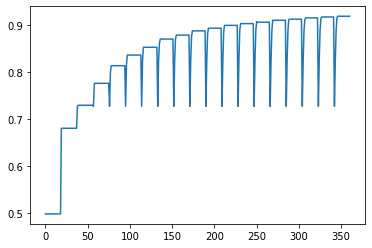

In [ ]:
plt.plot(scores_graph) #Graficamos los scores

In [ ]:
#Aplicamos el arbol de regresion con las caracteristicas optimas halladas anteriormente.
clf = DecisionTreeRegressor(random_state = 0, max_leaf_nodes = 20, max_depth = 20)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

clf.score(X, y)

0.9179697499724574

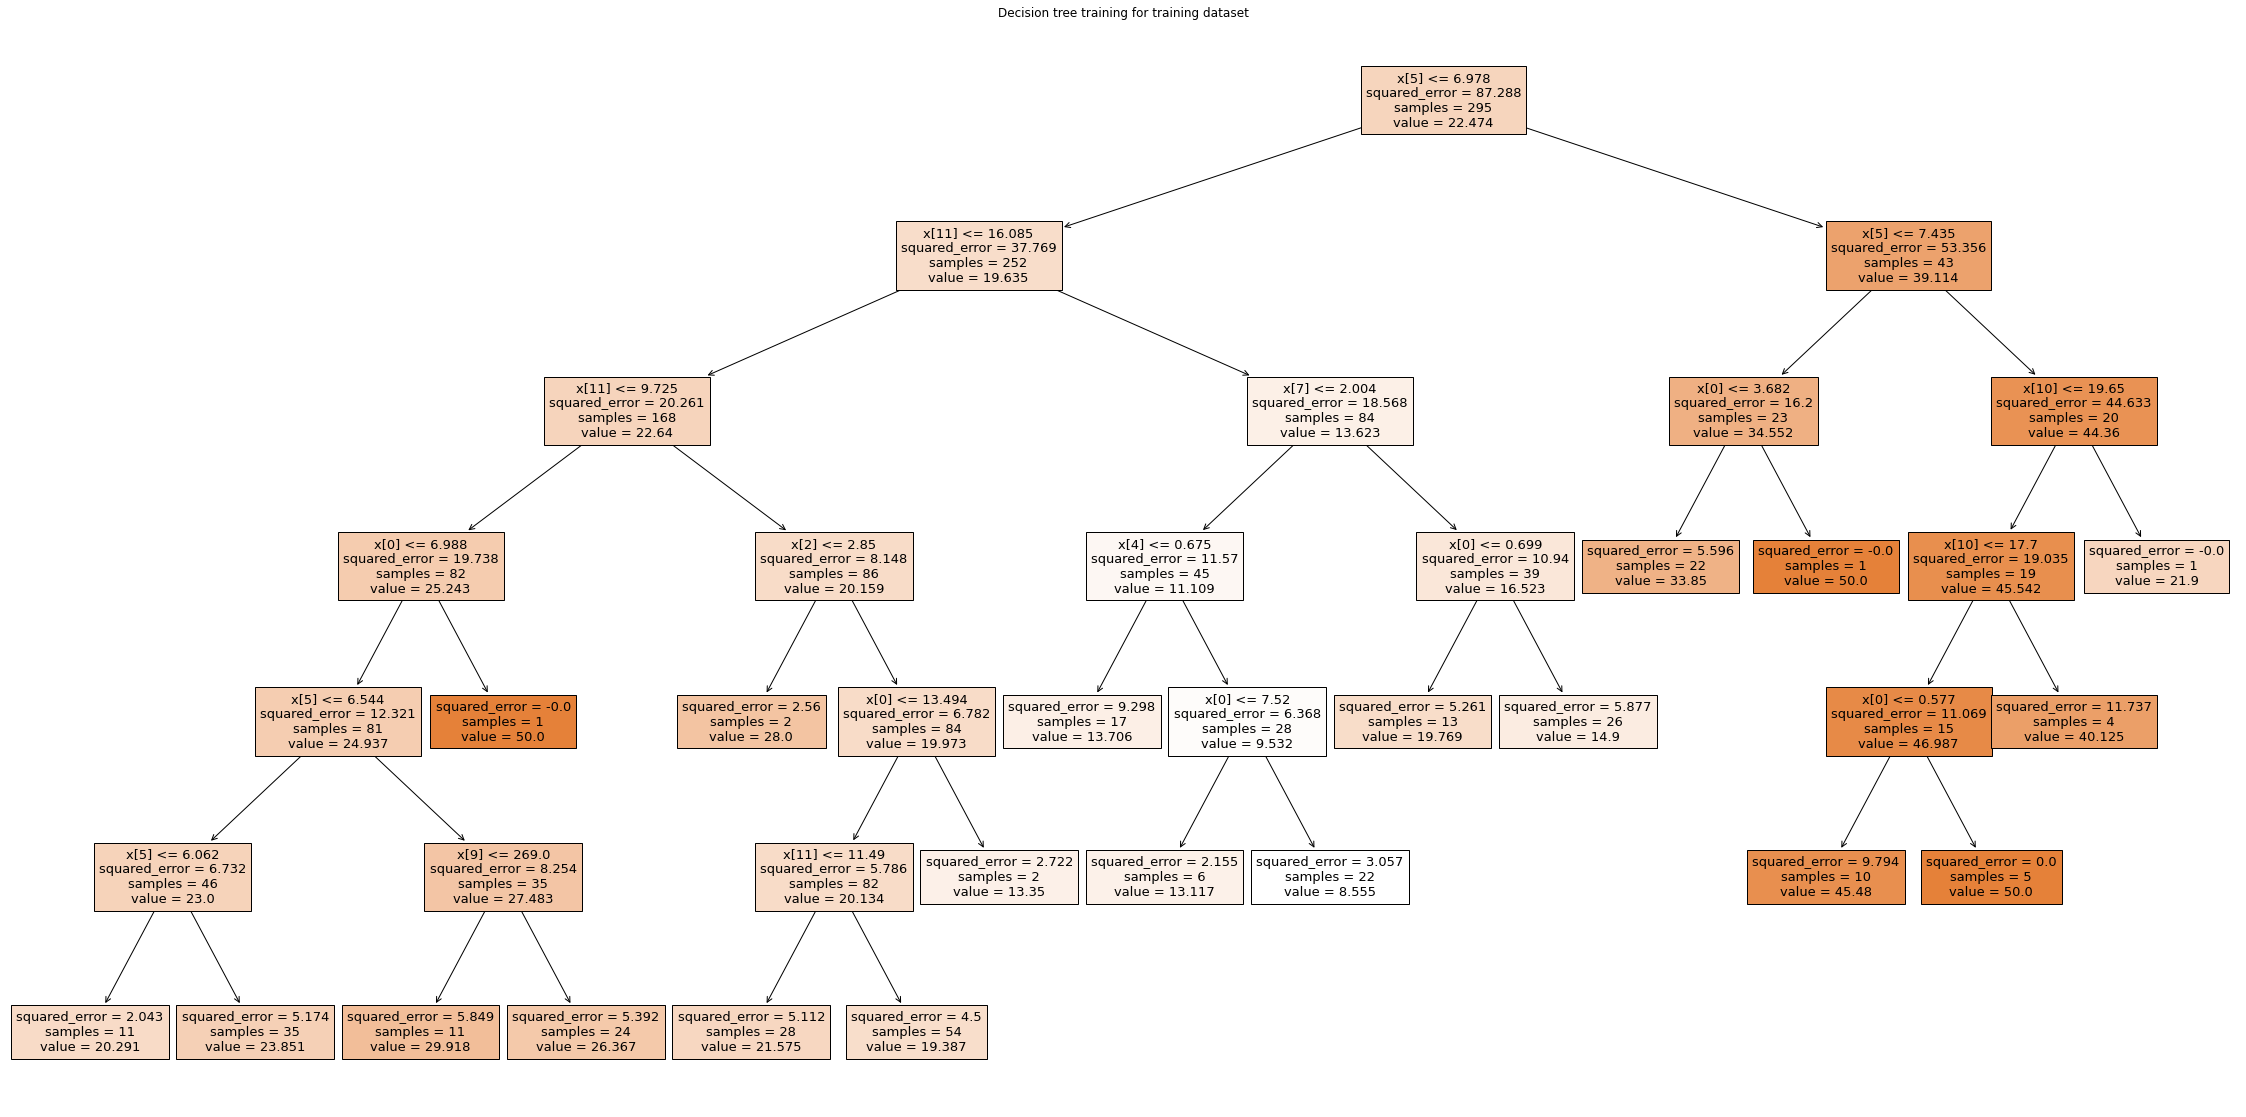

In [ ]:
plt.figure(figsize = (40,20))
plot_tree(clf, filled = True, class_names = True)
plt.title("Decision tree training for training dataset")
plt.show()

Las variables más relevantes para este modelo, observando el árbol, fueron:

**RM, LSTAT, CRIM** y **DIS**

La única que coincide con el modelo de regresión lineal es la variable **RM**. Con esto podemos observar que es especialmente relevante para la predicción de nuestra variable objetivo y que los modelos usan medidas distintas de predicción.


##**KNN**

In [ ]:
scores = []

for i in range(2, 30):
    knn = KNeighborsRegressor(n_neighbors = i) #Probamos el algoritmo KNN con distintas cantidades de vecinos para hallar el numero optimo para nuestro sistema.
    knn.fit(X_train, y_train)
    sc = knn.score(X_test, y_test)
    scores.append(sc)

scores

[0.635817762401313,
 0.6401678623169154,
 0.6076799495978062,
 0.609422772753176,
 0.5962540293192946,
 0.5542284301965931,
 0.5405415086018861,
 0.5277712501408462,
 0.5446098538299613,
 0.5051526753381326,
 0.48057508064482113,
 0.4709568262467789,
 0.4715670507725406,
 0.4668857687481144,
 0.4605976638100512,
 0.4390108000707308,
 0.43508180665176144,
 0.4302793395473382,
 0.4192344749063386,
 0.4195633343993648,
 0.40831080659389707,
 0.40652285150300704,
 0.39944720219388186,
 0.38593427224886623,
 0.39071079458872504,
 0.3889194411083783,
 0.38535943587213417,
 0.38380573963272446]

Mejor score = 0.6401678623169154 con k = 3

**Conclusiones:**

*   Se puede evidenciar que para 3 vecinos el KNN es el mas optimo, ya que con menos se sobreajusta y con mas no describe bien nuestros datos.
*   Para estos datos en especifico las regresiones dieron una fiabilidad muy parecida. Creemos que es debido a que los datos siguen una tendencia bastante clara la cual puede ser facilmente descrita con cualquier regresion.
*   Podemos deducir que gracias a eso dicho anteriormente el KNN esta teniendo una fiabilidad mas baja, ya que este metodo funciona mejor con datos un poco mas dispersos.
